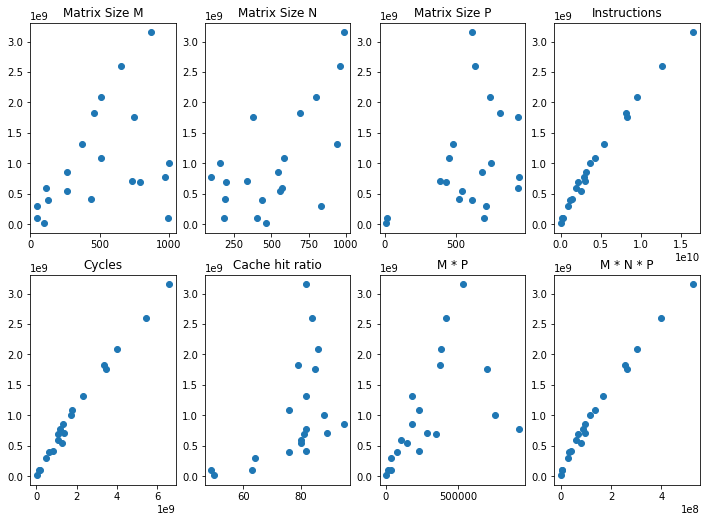

Coefficient of determination: 0.81


In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('DataMM.csv', sep = ";")

x = df[["Matrix Size M", "Matrix Size N", "Matrix Size P", "Instructions", "Cycles", "Cache hit ratio"]]
y = df.loc[:, "Time spent"]

plt.rcParams["figure.figsize"] = (12,8.5)
plt.subplot(2,4,1)
plt.title("Matrix Size M")
plt.scatter(x["Matrix Size M"], y)
plt.subplot(2,4,2)
plt.title("Matrix Size N")
plt.scatter(x["Matrix Size N"], y)
plt.subplot(2,4,3)
plt.title("Matrix Size P")
plt.scatter(x["Matrix Size P"], y)
plt.subplot(2,4,4)
plt.title("Instructions")
plt.scatter(x["Instructions"], y)
plt.subplot(2,4,5)
plt.title("Cycles")
plt.scatter(x["Cycles"], y)
plt.subplot(2,4,6)
plt.title("Cache hit ratio")
plt.scatter(x["Cache hit ratio"], y)
plt.subplot(2,4,7)
plt.title("M * P")
plt.scatter(x["Matrix Size M"] * x["Matrix Size P"], y)
plt.subplot(2,4,8)
plt.title("M * N * P")
plt.scatter(x["Matrix Size M"] * x["Matrix Size N"] * x["Matrix Size P"], y)
plt.savefig('IDA.png')
plt.show()

df["Matrix Size"] = df["Matrix Size M"] * df["Matrix Size N"] * df["Matrix Size P"]
x = df[["Instructions", "Cycles", "Matrix Size"]]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = lm().fit(x_train, y_train)
predictions = model.predict(x_test)
print("Coefficient of determination: %.2f" % r2_score(y_test, predictions))